In [0]:
!wget 'https://raw.githubusercontent.com/cs-deep-quickdraw/notebooks/master/100_classes.txt'
!mkdir data

--2020-01-17 15:15:04--  https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 760 [text/plain]
Saving to: ‘mini_classes.txt.1’

mini_classes.txt.1  100%[===================>]     760  --.-KB/s    in 0s      

2020-01-17 15:15:04 (139 MB/s) - ‘mini_classes.txt.1’ saved [760/760]



In [0]:
import urllib.request

f = open("mini_classes.txt","r")
# And for reading use
classes = [cls.strip() for cls in f.readlines()]
f.close()

def download(classes):
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, 'data/'+c+'.npy')

In [0]:
download(classes)

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dumbbell.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/traffic%20light.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/wristwatch.npy
https://storage.googleapis.com/quickdraw_dat

In [0]:
ls data/

['drums\n',
 'sun\n',
 'laptop\n',
 'anvil\n',
 'baseball_bat\n',
 'ladder\n',
 'eyeglasses\n',
 'grapes\n',
 'book\n',
 'dumbbell\n',
 'traffic_light\n',
 'wristwatch\n',
 'wheel\n',
 'shovel\n',
 'bread\n',
 'table\n',
 'tennis_racquet\n',
 'cloud\n',
 'chair\n',
 'headphones\n',
 'face\n',
 'eye\n',
 'airplane\n',
 'snake\n',
 'lollipop\n',
 'power_outlet\n',
 'pants\n',
 'mushroom\n',
 'star\n',
 'sword\n',
 'clock\n',
 'hot_dog\n',
 'syringe\n',
 'stop_sign\n',
 'mountain\n',
 'smiley_face\n',
 'apple\n',
 'bed\n',
 'shorts\n',
 'broom\n',
 'diving_board\n',
 'flower\n',
 'spider\n',
 'cell_phone\n',
 'car\n',
 'camera\n',
 'tree\n',
 'square\n',
 'moon\n',
 'radio\n',
 'hat\n',
 'pizza\n',
 'axe\n',
 'door\n',
 'tent\n',
 'umbrella\n',
 'line\n',
 'cup\n',
 'fan\n',
 'triangle\n',
 'basketball\n',
 'pillow\n',
 'scissors\n',
 't-shirt\n',
 'tooth\n',
 'alarm_clock\n',
 'paper_clip\n',
 'spoon\n',
 'microphone\n',
 'candle\n',
 'pencil\n',
 'envelope\n',
 'saw\n',
 'frying_pan\n',

Test class: drums


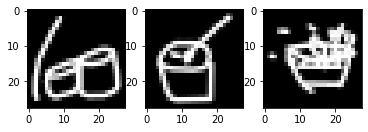

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Display one image
test_cls = np.load(f'data/{classes[0]}.npy')
print(f"Test class: {classes[0]}")

f, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.imshow(test_cls[0].reshape(28, 28), cmap='gray')
ax2.imshow(test_cls[1].reshape(28, 28), cmap='gray')
ax3.imshow(test_cls[2].reshape(28, 28), cmap='gray')

In [0]:
import pandas as pd
from torch.utils.data import Dataset
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable


class DrawDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        assert len(self.X) == len(self.Y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        return [torch.Tensor(self.X[idx]).type('torch.FloatTensor'), self.Y[idx]]

def load_dataset(max_classes=4, max_images_per_class=500):
  X = None
  Y = []

  for i, cls in enumerate(classes[:max_classes]):
    data = np.load(f'data/{cls}.npy')[:max_images_per_class].reshape(max_images_per_class, 1, 28, 28)
    if X is not None:
      X = np.concatenate((X, data))
    else:
      X = data

    Y.extend([i for _ in range(max_images_per_class)])

  return DrawDataset(X, Y)

In [0]:
dataset = load_dataset()
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [int(0.8*len(dataset)), int(0.2*len(dataset))])

In [0]:
# we use GPU if available, otherwise CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [0]:
batch_size = 10
train_loader = torch.utils.data.DataLoader(
                 dataset=train_dataset,
                 batch_size=batch_size,
                 shuffle=True)

test_loader = torch.utils.data.DataLoader(
                 dataset=test_dataset,
                 batch_size=batch_size,
                 shuffle=True)

In [0]:
NUM_CONV_1=10 # try 32
NUM_CONV_2=20 # try 64
NUM_FC=500 # try 1024

NUM_CLASSES = 4

class CNNNet(nn.Module):
    def __init__(self):
        super(CNNNet,self).__init__()
        self.conv_1 = nn.Conv2d(1,NUM_CONV_1,5,1) # kernel_size = 5
        self.conv_2 = nn.Conv2d(NUM_CONV_1,NUM_CONV_2,5,1) # kernel_size = 5
        self.drop = nn.Dropout2d()
        self.fc_1 = nn.Linear(4*4*NUM_CONV_2, NUM_FC)
        self.fc_2 = nn.Linear(NUM_FC,NUM_CLASSES)
    def forward(self,x):
        x = F.relu(self.conv_1(x))
        x = F.max_pool2d(x, 2,2)
        x = F.relu(self.conv_2(x))
        # x = F.relu(self.drop(self.conv_2(x)))
        x = F.max_pool2d(x, 2,2)
        x = x.view(-1,4*4*NUM_CONV_2)
        x = F.relu(self.fc_1(x))
        x = self.fc_2(x)
        return x
        # en utilisant loss = F.nll_loss(output, target) on peut faire
        # return F.log_softmax(x, dim=1)


In [0]:
model = CNNNet()

model.to(device) # puts model on GPU / CPU

# optimization hyperparameters
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01) # try lr=0.01, momentum=0.9
loss_fn = nn.CrossEntropyLoss()

In [0]:
# main loop (train+test)
for epoch in range(50):
    # training
    model.train() # mode "train" agit sur "dropout" ou "batchnorm"
    for batch_idx, (x, target) in enumerate(train_loader):
        optimizer.zero_grad()
        x, target = Variable(x).to(device), Variable(target).to(device)
        out = model(x)
        loss = loss_fn(out, target)
        loss.backward()
        optimizer.step()
        if batch_idx %100 ==0:
            print('epoch {} batch {} [{}/{}] training loss: {}'.format(epoch,batch_idx,batch_idx*len(x),
                    len(train_loader.dataset),loss.item()))
    # testing
    model.eval()
    correct = 0
    with torch.no_grad():
        for batch_idx, (x, target) in enumerate(test_loader):
            x, target = x.to(device), target.to(device)
            out = model(x)
            loss = loss_fn(out, target)
            # _, prediction = torch.max(out.data, 1)
            prediction = out.argmax(dim=1, keepdim=True) # index of the max log-probability
            correct += prediction.eq(target.view_as(prediction)).sum().item()
    taux_classif = 100. * correct / len(test_loader.dataset)
    print('Accuracy: {}/{} (tx {:.2f}%, err {:.2f}%)\n'.format(correct,
     len(test_loader.dataset), taux_classif, 100.-taux_classif))

epoch 0 batch 0 [0/1600] training loss: 13.530731201171875
epoch 0 batch 100 [1000/1600] training loss: 1.2948780059814453
Accuracy: 114/400 (tx 28.50%, err 71.50%)

epoch 1 batch 0 [0/1600] training loss: 1.3893580436706543
epoch 1 batch 100 [1000/1600] training loss: 1.4557610750198364
Accuracy: 119/400 (tx 29.75%, err 70.25%)

epoch 2 batch 0 [0/1600] training loss: 1.3606607913970947
epoch 2 batch 100 [1000/1600] training loss: 1.3651775121688843
Accuracy: 120/400 (tx 30.00%, err 70.00%)

epoch 3 batch 0 [0/1600] training loss: 1.3272508382797241
epoch 3 batch 100 [1000/1600] training loss: 1.325331449508667
Accuracy: 138/400 (tx 34.50%, err 65.50%)

epoch 4 batch 0 [0/1600] training loss: 1.3897197246551514
epoch 4 batch 100 [1000/1600] training loss: 1.3654212951660156
Accuracy: 140/400 (tx 35.00%, err 65.00%)

epoch 5 batch 0 [0/1600] training loss: 1.312565565109253
epoch 5 batch 100 [1000/1600] training loss: 1.2802722454071045
Accuracy: 155/400 (tx 38.75%, err 61.25%)

epoch 